In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score,f1_score, roc_auc_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate,StratifiedKFold,KFold
from sklearn import neighbors
import warnings
warnings.filterwarnings("ignore")

In [2]:
rawdata = pd.read_csv('CVD_cleaned.csv')
#Number of rows and columns present in the dataset
rawdata.shape

(308854, 19)

## Data Exploration

In [3]:
rawdata.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


In [4]:
rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

### Missing Values

In [5]:
# Check for missing values in the entire DataFrame
missing_values = rawdata.isnull().sum()

# Check if there are any missing values in the DataFrame
if missing_values.sum() > 0:
    print("Missing values are present.")
    print("Columns with missing values:")
    print(missing_values[missing_values > 0])
else:
    print("No missing values are present.")


No missing values are present.


In [6]:
rawdata.describe()

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000
mean,170.615249,83.588655,28.626211,5.096366,29.835200,15.110441,6.296616
std,10.658026,21.343210,6.522323,8.199763,24.875735,14.926238,8.582954
min,91.000000,24.950000,12.020000,0.000000,0.000000,0.000000,0.000000
25%,163.000000,68.040000,24.210000,0.000000,12.000000,4.000000,2.000000
50%,170.000000,81.650000,27.440000,1.000000,30.000000,12.000000,4.000000
75%,178.000000,95.250000,31.850000,6.000000,30.000000,20.000000,8.000000
max,241.000000,293.020000,99.330000,30.000000,120.000000,128.000000,128.000000


### Visualization of Data

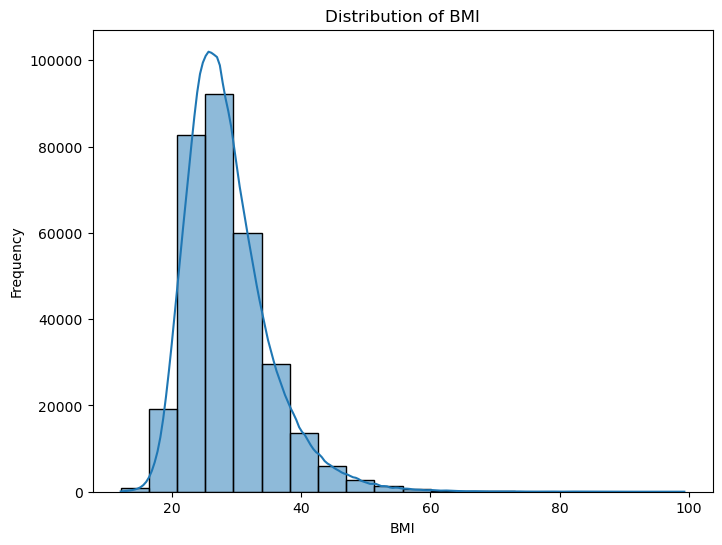

In [7]:
##Numerical Data
plt.figure(figsize=(8, 6))
sns.histplot(rawdata['BMI'], bins=20, kde=True)
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

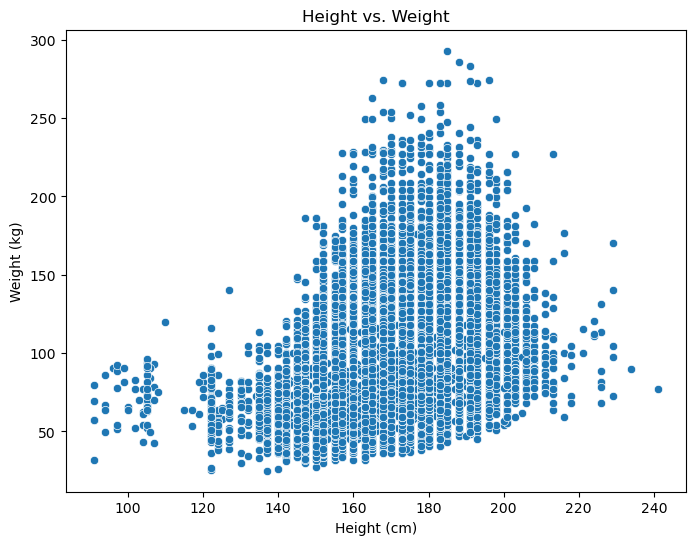

In [8]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Height_(cm)', y='Weight_(kg)', data=rawdata)
plt.title('Height vs. Weight')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

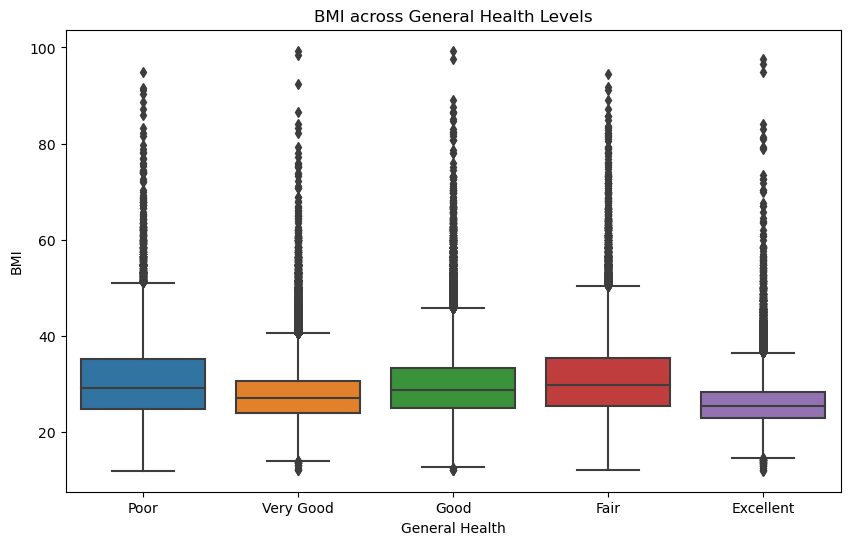

In [9]:
##Categorical data
plt.figure(figsize=(10, 6))
sns.boxplot(x='General_Health', y='BMI', data=rawdata)
plt.title('BMI across General Health Levels')
plt.xlabel('General Health')
plt.ylabel('BMI')
plt.show()


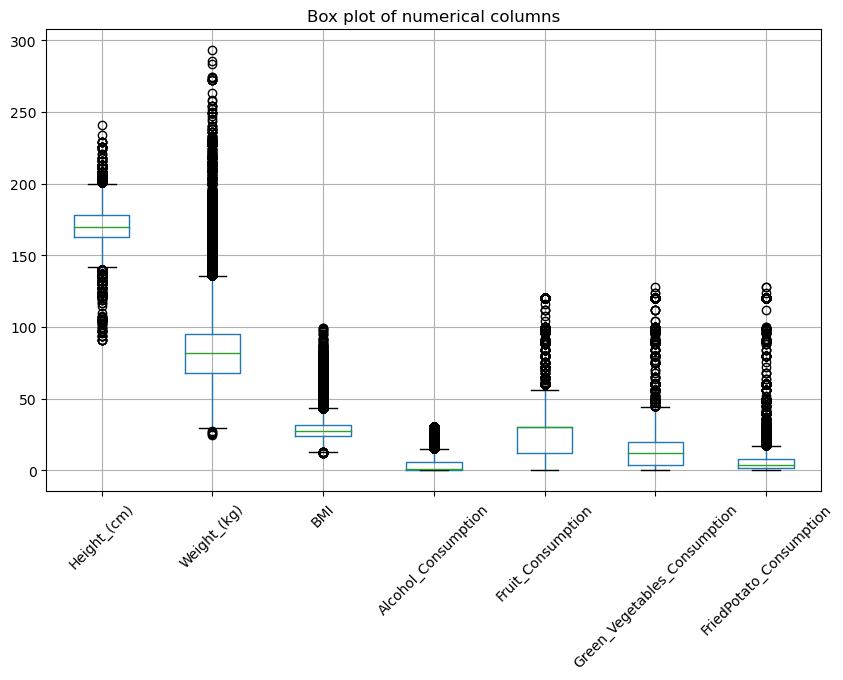

In [10]:
# Checkig outliers
plt.figure(figsize=(10, 6))
rawdata.boxplot()
plt.title("Box plot of numerical columns")
plt.xticks(rotation=45)
plt.show()



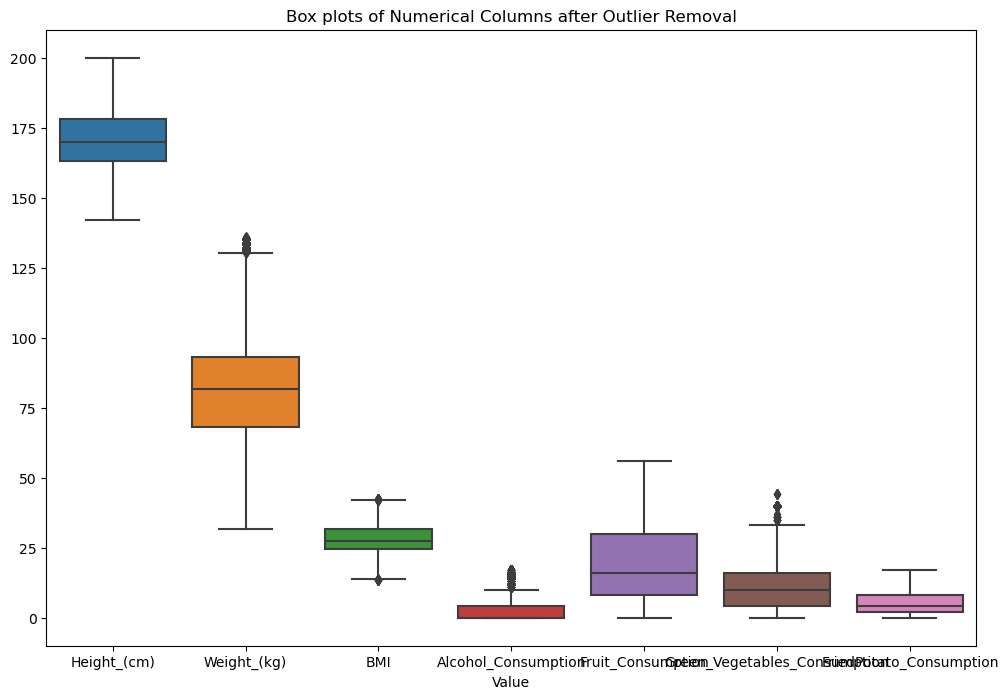

In [11]:
#Removing all the outliers
df = rawdata.copy()

# Define a function to detect and remove outliers using IQR for a specific column
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_cleaned

# Apply the function to remove outliers from all numerical columns
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    df = remove_outliers_iqr(df, column)

# Visualize box plots for all numerical columns after outlier removal
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.title('Box plots of Numerical Columns after Outlier Removal')
plt.xlabel('Value')
plt.show()


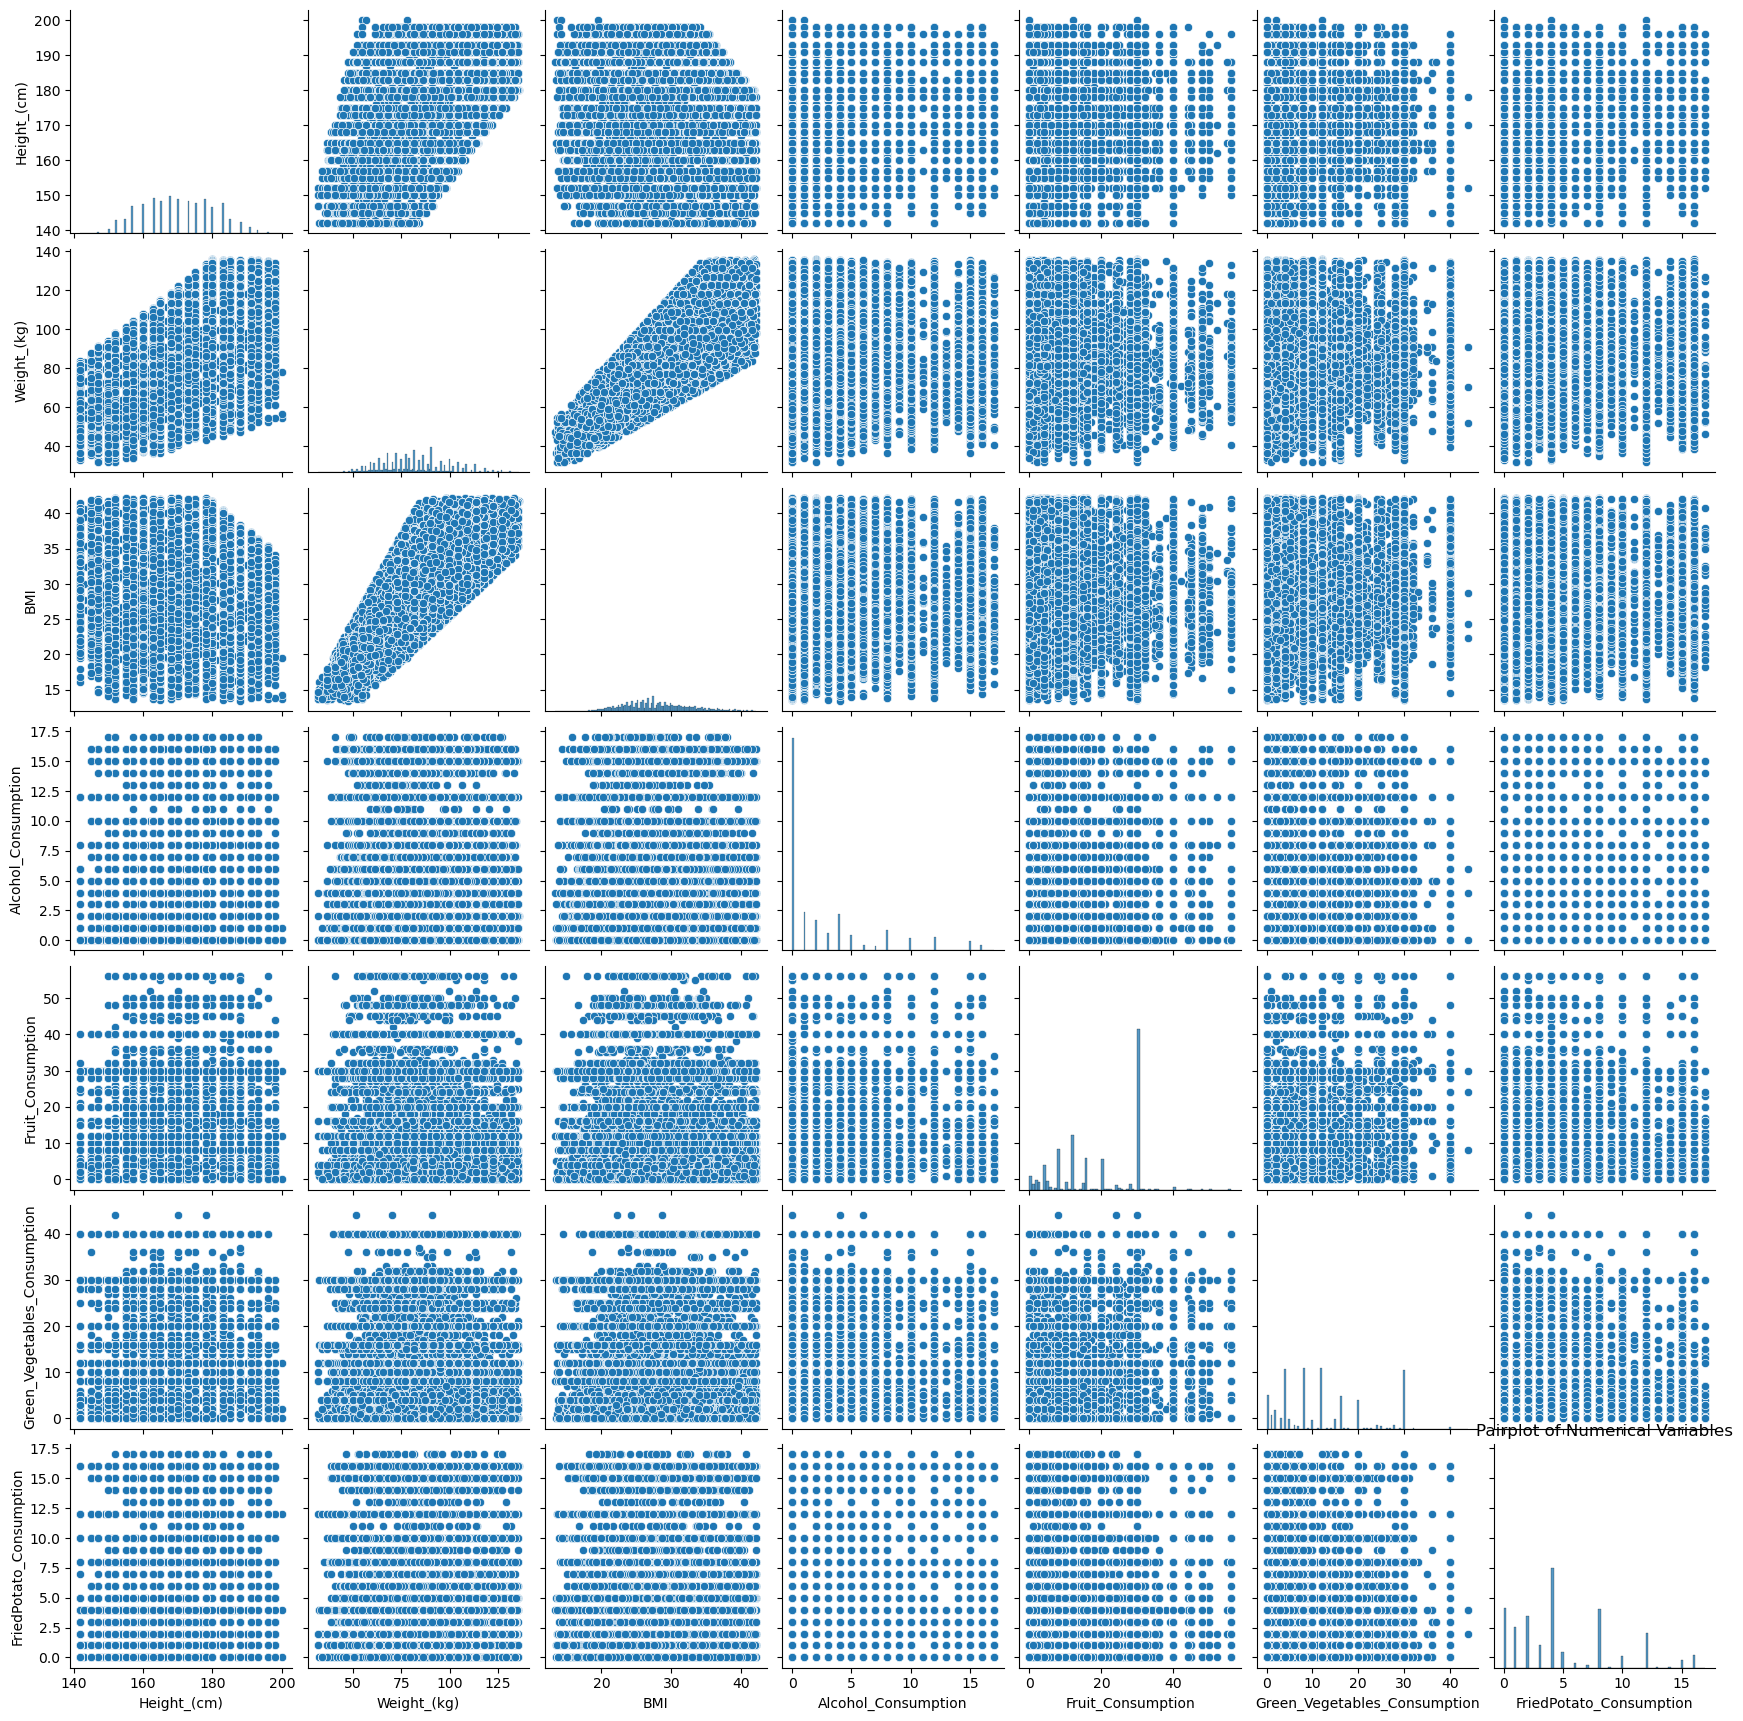

In [12]:
# Scatter plot to visually inspect outliers in numerical variables
sns.pairplot(df)
plt.title('Pairplot of Numerical Variables')
plt.show()

## Feature Engineering

In [13]:
# encoding
df['General_Health'] = df['General_Health'].replace({
    'Very Good':5,
    'Good':4,
    'Excellent':3,
    'Fair':2,
    'Poor':1
})



df['Sex'] = df['Sex'].replace({
    'Male':0,
    'Female':1
})

df['Checkup'] = df['Checkup'].replace({
    'Never':0,
    'Within the past year':1,
    'Within the past 2 years':2,
    'Within the past 5 years':3,
    '5 or more years ago':4
})


age_category_df = pd.DataFrame(df, columns=['Age_Category'])

df_dummies = pd.get_dummies(age_category_df, columns=['Age_Category'])

df=df.join(df_dummies)

df = df.drop('Age_Category_80+',axis=1)



df['Diabetes'] = df['Diabetes'].replace({
    'Yes, but female told only during pregnancy':1,
    'No, pre-diabetes or borderline diabetes':0,
    'Yes':1,
    'No':0
})

df['Exercise'] = df['Exercise'].replace({
    'Yes':1,
    'No': 0
})



df['Skin_Cancer'] = df['Skin_Cancer'].replace({
    'Yes':1,
    'No': 0
})

df['Other_Cancer'] = df['Other_Cancer'].replace({
    'Yes':1,
    'No': 0
})

df['Depression'] = df['Depression'].replace({
    'Yes':1,
    'No': 0
})
df['Arthritis'] = df['Arthritis'].replace({
    'Yes':1,
    'No': 0
})
df['Smoking_History'] = df['Smoking_History'].replace({
    'Yes':1,
    'No': 0
})

In [14]:
df= df.drop('Age_Category',axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185803 entries, 0 to 308853
Data columns (total 30 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                185803 non-null  int64  
 1   Checkup                       185803 non-null  int64  
 2   Exercise                      185803 non-null  int64  
 3   Heart_Disease                 185803 non-null  object 
 4   Skin_Cancer                   185803 non-null  int64  
 5   Other_Cancer                  185803 non-null  int64  
 6   Depression                    185803 non-null  int64  
 7   Diabetes                      185803 non-null  int64  
 8   Arthritis                     185803 non-null  int64  
 9   Sex                           185803 non-null  int64  
 10  Height_(cm)                   185803 non-null  float64
 11  Weight_(kg)                   185803 non-null  float64
 12  BMI                           185803 non-nul

In [15]:
 df.tail()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,...,Age_Category_30-34,Age_Category_35-39,Age_Category_40-44,Age_Category_45-49,Age_Category_50-54,Age_Category_55-59,Age_Category_60-64,Age_Category_65-69,Age_Category_70-74,Age_Category_75-79
308848,4,3,1,No,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
308849,5,1,1,No,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
308851,5,4,1,No,0,0,1,1,0,1,...,1,0,0,0,0,0,0,0,0,0
308852,5,1,1,No,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
308853,3,1,1,No,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [16]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
scaler = MinMaxScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
df.head(5)

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,...,Age_Category_30-34,Age_Category_35-39,Age_Category_40-44,Age_Category_45-49,Age_Category_50-54,Age_Category_55-59,Age_Category_60-64,Age_Category_65-69,Age_Category_70-74,Age_Category_75-79
0,0.00,0.50,0.0,No,0.0,0.0,0.0,0.0,1.0,1.0,...,0,0,0,0,0,0,0,0,1,0
1,1.00,0.25,0.0,Yes,0.0,0.0,0.0,1.0,0.0,1.0,...,0,0,0,0,0,0,0,0,1,0
2,1.00,0.25,1.0,No,0.0,0.0,0.0,1.0,0.0,1.0,...,0,0,0,0,0,0,1,0,0,0
3,0.00,0.25,1.0,Yes,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,0.75,0.25,0.0,No,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


## Split Data

In [17]:
from sklearn import preprocessing
before_encoding = df['Heart_Disease'] 
label_e = preprocessing.LabelEncoder()
label_e.fit(before_encoding)
y = label_e.transform(before_encoding) 
df['Heart_Disease'] = y
X = df.drop('Heart_Disease',axis=1)
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

#Splitting data for Training and Testing
X_train_temp, X_test, y_train_temp, y_test = train_test_split(X, y, test_size=0.25, random_state=48)
#Splitting data for Training and Validation
X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=0.25, random_state=48)

## Model Selection and Training

## Classifier

In [18]:
replace_cols = ['Age_Category_18-24', 'Age_Category_25-29',
       'Age_Category_30-34', 'Age_Category_35-39', 'Age_Category_40-44',
       'Age_Category_45-49', 'Age_Category_50-54', 'Age_Category_55-59',
       'Age_Category_60-64', 'Age_Category_65-69', 'Age_Category_70-74',
       'Age_Category_75-79']

for i in replace_cols:
     X[i].replace([True, False], [1, 0], inplace=True)
        
x = np.array(X)

In [19]:
# USINF THE MODEL_SELCETION FUCNTION FROM SKLEARN TO DETERMINE THE BEST MODEL AND THEN DO HYPERPARAMETER TUNING

In [20]:
from sklearn import model_selection

# Create three different classifiers
clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()
clf4 = DecisionTreeClassifier(random_state=1)
 
# Print a header for the cross-validation results
print('5-fold cross validation:\n')
 
# Create a list of labels for the classifiers
labels = ['Logistic Regression', 'Random Forest', 'Naive Bayes', 'Decision Tree']
 
# Loop through the classifiers and perform 5-fold cross-validation for each
for clf, label in zip([clf1, clf2, clf3, clf4], labels):
 
    # Use cross_val_score to compute accuracy scores using 5-fold cross-validation
    scores = model_selection.cross_val_score(clf, X_train, y_train, 
                                              cv=5, 
                                              scoring='accuracy')
     
    # Print the mean accuracy and standard deviation of accuracy for the current classifier
    print("Accuracy: %0.2f (+/- %0.2f) [%s]"
          % (scores.mean(), scores.std(), label))

NameError: name 'GaussianNB' is not defined

In [ ]:
clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()
clf4 = DecisionTreeClassifier(random_state=1)
 
 
clf1.fit(X_train[:,1:3], y_train)
clf2.fit(X_train[:,1:3], y_train)
clf3.fit(X_train[:,1:3], y_train)
clf4.fit(X_train[:,1:3], y_train)
 
classifiers = [clf1, clf2, clf3, clf4]
titles = ['Logistic Regression', 'Random Forest', 'Naive Bayes', 'Decision Tree']
 
fig, axes = plt.subplots(1, 4, figsize=(10, 5))
plt.subplots_adjust(wspace=0.4, hspace=0.4)
 
    
    
for clf, title, ax in zip(classifiers, titles, axes.flatten()):
    plot_decision_regions(X_train[:,1:3], y_train, clf=clf, ax=ax)
    ax.set_title(title)
    ax.set_axis_off()
     
plt.tight_layout()
plt.savefig('3 classifiers.png')
plt.show()

In [ ]:
# Based on the above model selection method, we chose only logistic regression & random forest classiifers. 
# we will use an ensemble model of both the classifiers and use a voting method for our model

In [ ]:
from mlxtend.plotting import plot_decision_regions

# Create a Hard Voting Classifier
voting_clf_hard = VotingClassifier(
    estimators=[
        (labels[0], clf1),  # Include the first classifier (Logistic Regression)
        (labels[1], clf2),  # Include the second classifier (Random Forest)
        (labels[3], clf4),
    ],
    voting='hard'  # Specify hard voting, where the majority class prediction is chosen
)




# Create a Soft Voting Classifier
voting_clf_soft = VotingClassifier(
    estimators=[
        (labels[0], clf1),  # Include the first classifier (Logistic Regression)
        (labels[1], clf2),  # Include the second classifier (Random Forest)
        (labels[3], clf4),
    ],
    voting='soft'  # Specify soft voting, where class probabilities are combined
)




# Create a new list of labels that includes Voting Classifiers
labels_new = ['Logistic Regression', 'Random Forest',
              'Voting_Classifier_Hard', 'Voting_Classifier_Soft']
 
# Loop through the classifiers and perform 5-fold cross-validation for each
for clf, label in zip([clf1, clf2, clf4, voting_clf_hard, voting_clf_soft], labels_new):
 
    # Use cross_val_score to compute accuracy scores using 5-fold cross-validation
    scores = model_selection.cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
     
    # Print the mean accuracy and standard deviation of accuracy for the current classifier
    print("Accuracy: %0.2f (+/- %0.2f) [%s]"
          % (scores.mean(), scores.std(), label))

In [ ]:
## DO HYPERPARAMETER TURNING FOR LOGISTIC REGRESSION BELOW (SAME AS HOW YOU'VE DONE FOR )

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate, StratifiedKFold
import numpy as np

# Define hyperparameter values to tune
penalty_values = ['l1', 'l2']
C_values = [0.001, 0.01, 0.1, 1, 10, 100]

# Define N-fold cross-validation
n_splits = 10
kk = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=22)

# Perform cross-validation for each hyperparameter setting
for penalty in penalty_values:
    for C in C_values:
        clf = LogisticRegression(penalty=penalty, C=C, solver='liblinear')
        scores = cross_validate(clf, X_train, y_train, 
                                scoring=['accuracy', 'precision', 'recall', 'roc_auc'], 
                                cv=kk, n_jobs=None, return_estimator=True)
        
        print('Penalty:', penalty, 'C:', C)
        print('Accuracy:', np.mean(scores['test_accuracy']),
              'Precision:', np.mean(scores['test_precision']),
              'Recall:', np.mean(scores['test_recall']),
              'ROC-AUC:', np.mean(scores['test_roc_auc']))

In [ ]:
## DO HYPERPARAMETER TURNING FOR RANDOM FOREST BELOW 

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate, StratifiedKFold
import numpy as np

# Define hyperparameter values to tune
n_estimators_values = [100, 200]  # Example values for number of trees
max_depth_values = [5, 10, 15, 20]
min_samples_leaf_values = [1, 5, 10, 15]

# Define N-fold cross-validation
n_splits = 10
kk = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=22)

# Perform cross-validation for each hyperparameter setting
for n_estimators in n_estimators_values:
    for max_depth in max_depth_values:
        for min_samples_leaf in min_samples_leaf_values:
            clf = RandomForestClassifier(n_estimators=n_estimators, 
                                         max_depth=max_depth, 
                                         min_samples_leaf=min_samples_leaf,
                                         random_state=42)
            scores = cross_validate(clf, X_train, y_train, 
                                    scoring=['accuracy', 'precision', 'recall', 'roc_auc'], 
                                    cv=kk, n_jobs=None, return_estimator=True)
            
            print('n_estimators:', n_estimators, 'Max Depth:', max_depth, 'Min Samples Leaf:', min_samples_leaf)
            print('Accuracy:', np.mean(scores['test_accuracy']),
                  'Precision:', np.mean(scores['test_precision']),
                  'Recall:', np.mean(scores['test_recall']),
                  'ROC-AUC:', np.mean(scores['test_roc_auc']))


In [ ]:
#   HYPERPARAMETER TURNING FOR DECISION TREE (FINDING THE BEST HYPERPARAMETER FOR IT)

# model selection and training simultaneously through the process of hyperparameter tuning using cross-validation.
max_depth_values = [None, 5, 10, 15, 20]
min_samples_leaf_values = [1, 5, 10, 15, 20]

# Define N-fold cross-validation
n_splits = 10
kk = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=22)

# Perform cross-validation for each hyperparameter setting
for max_depth in max_depth_values:
    for min_samples_leaf in min_samples_leaf_values:
        clf = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf)
        scores = cross_validate(clf, X_train, y_train, 
                                scoring=['accuracy', 'precision', 'recall', 'roc_auc'], 
                                cv=kk, n_jobs=None, return_estimator=True)
        
        print('Max Depth:', max_depth, 'Min Samples Leaf:', min_samples_leaf)
        print('Accuracy:', np.mean(scores['test_accuracy']),
              'Precision:', np.mean(scores['test_precision']),
              'Recall:', np.mean(scores['test_recall']),
              'ROC-AUC:', np.mean(scores['test_roc_auc']))

## MODEL EVALUATION ON TEST DATA AFTER CHOOSING THE BEST HYPERPARAMETERS

In [ ]:
from sklearn.metrics import confusion_matrix as cm


clf1 = LogisticRegression(penalty='l1', C=0.01, solver='liblinear')
clf2 = RandomForestClassifier(n_estimators=100, 
                                         max_depth=10, 
                                         min_samples_leaf=10)
clf3 = DecisionTreeClassifier(max_depth=5, min_samples_leaf=5)


# Create a Soft Voting Classifier
voting_clf_soft = VotingClassifier(
    estimators=[
        (labels[0], clf1),  # Include the first classifier (Logistic Regression)
        (labels[1], clf2),  # Include the second classifier (Random Forest)
        (labels[3], clf3),
    ],
    voting='soft'  # Specify soft voting, where class probabilities are combined
)




## TRAINING AND EVALUATING ON TEST DATA


clf_vsoft=voting_clf_soft.fit(X_train, y_train)
y_pred=clf_vsoft.predict(X_test)

confM = cm(y_test, y_pred)
print(confM)

acc=accuracy_score(y_test, y_pred)
f1= f1_score(y_test, y_pred)
auc = roc_auc_score(y_test,y_pred)
print('Accuracy = ',acc, ', F1 = ', f1, ',AUC= ', auc)